In [1]:
import torch, pickle, argparse, os, warnings, copy, time, mlflow
import numpy as np, pytorch_lightning as pl, matplotlib.pyplot as plt, eagerpy as ep
from models import ConvNet
from data_loader import load_test_data
from tqdm.notebook import tqdm
from mlflow.tracking.artifact_utils import get_artifact_uri

In [2]:
tracking_uri = 'sqlite:///mlruns/database.db'
mlflow.set_tracking_uri(tracking_uri)
df=mlflow.search_runs(experiment_names=['model_training'])
run_id=df[df['tags.mlflow.runName']==str(1669397724)]['run_id'].values[0]
artifact_path = get_artifact_uri(run_id=run_id, tracking_uri=tracking_uri)

In [3]:
TEST_PATH = "s2_mnist_cs1.gz"
test_data = load_test_data(TEST_PATH)

In [4]:
r_sample_uniform = torch.rand(1000,1,60,60)*255
r_sample_normal = (torch.randn(1000,1,60,60) + 5)*255/10

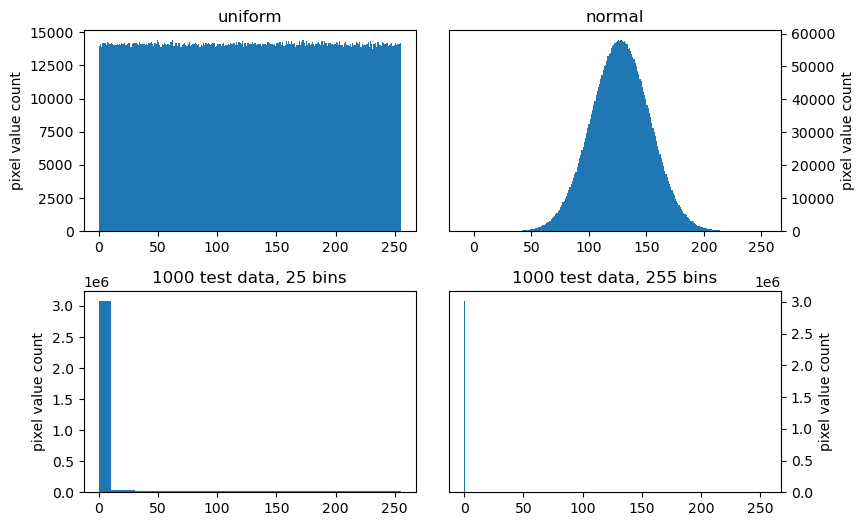

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (9, 6), gridspec_kw={'wspace':0.1, 'hspace':0.3})

axs[0,0].hist(r_sample_uniform.flatten(), bins=255)
axs[0,0].set_title('uniform')
axs[0,1].hist(r_sample_normal.flatten(), bins=255)
axs[0,1].set_title('normal')
axs[1,0].hist(test_data[:1000][0].flatten(), bins=25)
axs[1,0].set_title('1000 test data, 25 bins')
axs[1,1].hist(test_data[:1000][0].flatten(), bins=255)
axs[1,1].set_title('1000 test data, 255 bins')
for i in range(2):
    axs[i,1].yaxis.set_label_position("right")
    axs[i,1].yaxis.tick_right()
    for j in range(2):
        axs[i,j].set_ylabel('pixel value count')
        
plt.savefig('input_distributions.pdf', bbox_inches="tight")
plt.show()

In [18]:
print(torch.mean(r_sample_uniform))
print(torch.std_mean(r_sample_normal))

tensor(127.5916)
(tensor(25.5037), tensor(127.5022))


/media/data/schuh/conda_envs/envs/s2cnn_j/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:25: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
TEST RESULTS
{'test_acc': tensor(0.1135), 'test_loss': 2.304154634475708}
--------------------------------------------------------------------------------


/media/data/schuh/conda_envs/envs/s2cnn_j/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:25: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
TEST RESULTS
{'test_acc': tensor(0.3985), 'test_loss': 1.665771245956421}
--------------------------------------------------------------------------------


/media/data/schuh/conda_envs/envs/s2cnn_j/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:25: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
TEST RESULTS
{'test_acc': tensor(0.4244), 'test_loss': 1.5390411615371704}
--------------------------------------------------------------------------------


/media/data/schuh/conda_envs/envs/s2cnn_j/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:25: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
TEST RESULTS
{'test_acc': tensor(0.4640), 'test_loss': 1.4133610725402832}
--------------------------------------------------------------------------------


/media/data/schuh/conda_envs/envs/s2cnn_j/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:25: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
TEST RESULTS
{'test_acc': tensor(0.5602), 'test_loss': 1.2348743677139282}
--------------------------------------------------------------------------------


/media/data/schuh/conda_envs/envs/s2cnn_j/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:25: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
TEST RESULTS
{'test_acc': tensor(0.5619), 'test_loss': 1.2129852771759033}
--------------------------------------------------------------------------------


/media/data/schuh/conda_envs/envs/s2cnn_j/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:25: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
TEST RESULTS
{'test_acc': tensor(0.6291), 'test_loss': 1.0676212310791016}
--------------------------------------------------------------------------------


/media/data/schuh/conda_envs/envs/s2cnn_j/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:25: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
TEST RESULTS
{'test_acc': tensor(0.6663), 'test_loss': 0.9847193360328674}
--------------------------------------------------------------------------------


/media/data/schuh/conda_envs/envs/s2cnn_j/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:25: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
TEST RESULTS
{'test_acc': tensor(0.7161), 'test_loss': 0.8256868124008179}
--------------------------------------------------------------------------------


/media/data/schuh/conda_envs/envs/s2cnn_j/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:25: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
TEST RESULTS
{'test_acc': tensor(0.7280), 'test_loss': 0.7945797443389893}
--------------------------------------------------------------------------------


/media/data/schuh/conda_envs/envs/s2cnn_j/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:25: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
TEST RESULTS
{'test_acc': tensor(0.7397), 'test_loss': 0.7594111561775208}
--------------------------------------------------------------------------------


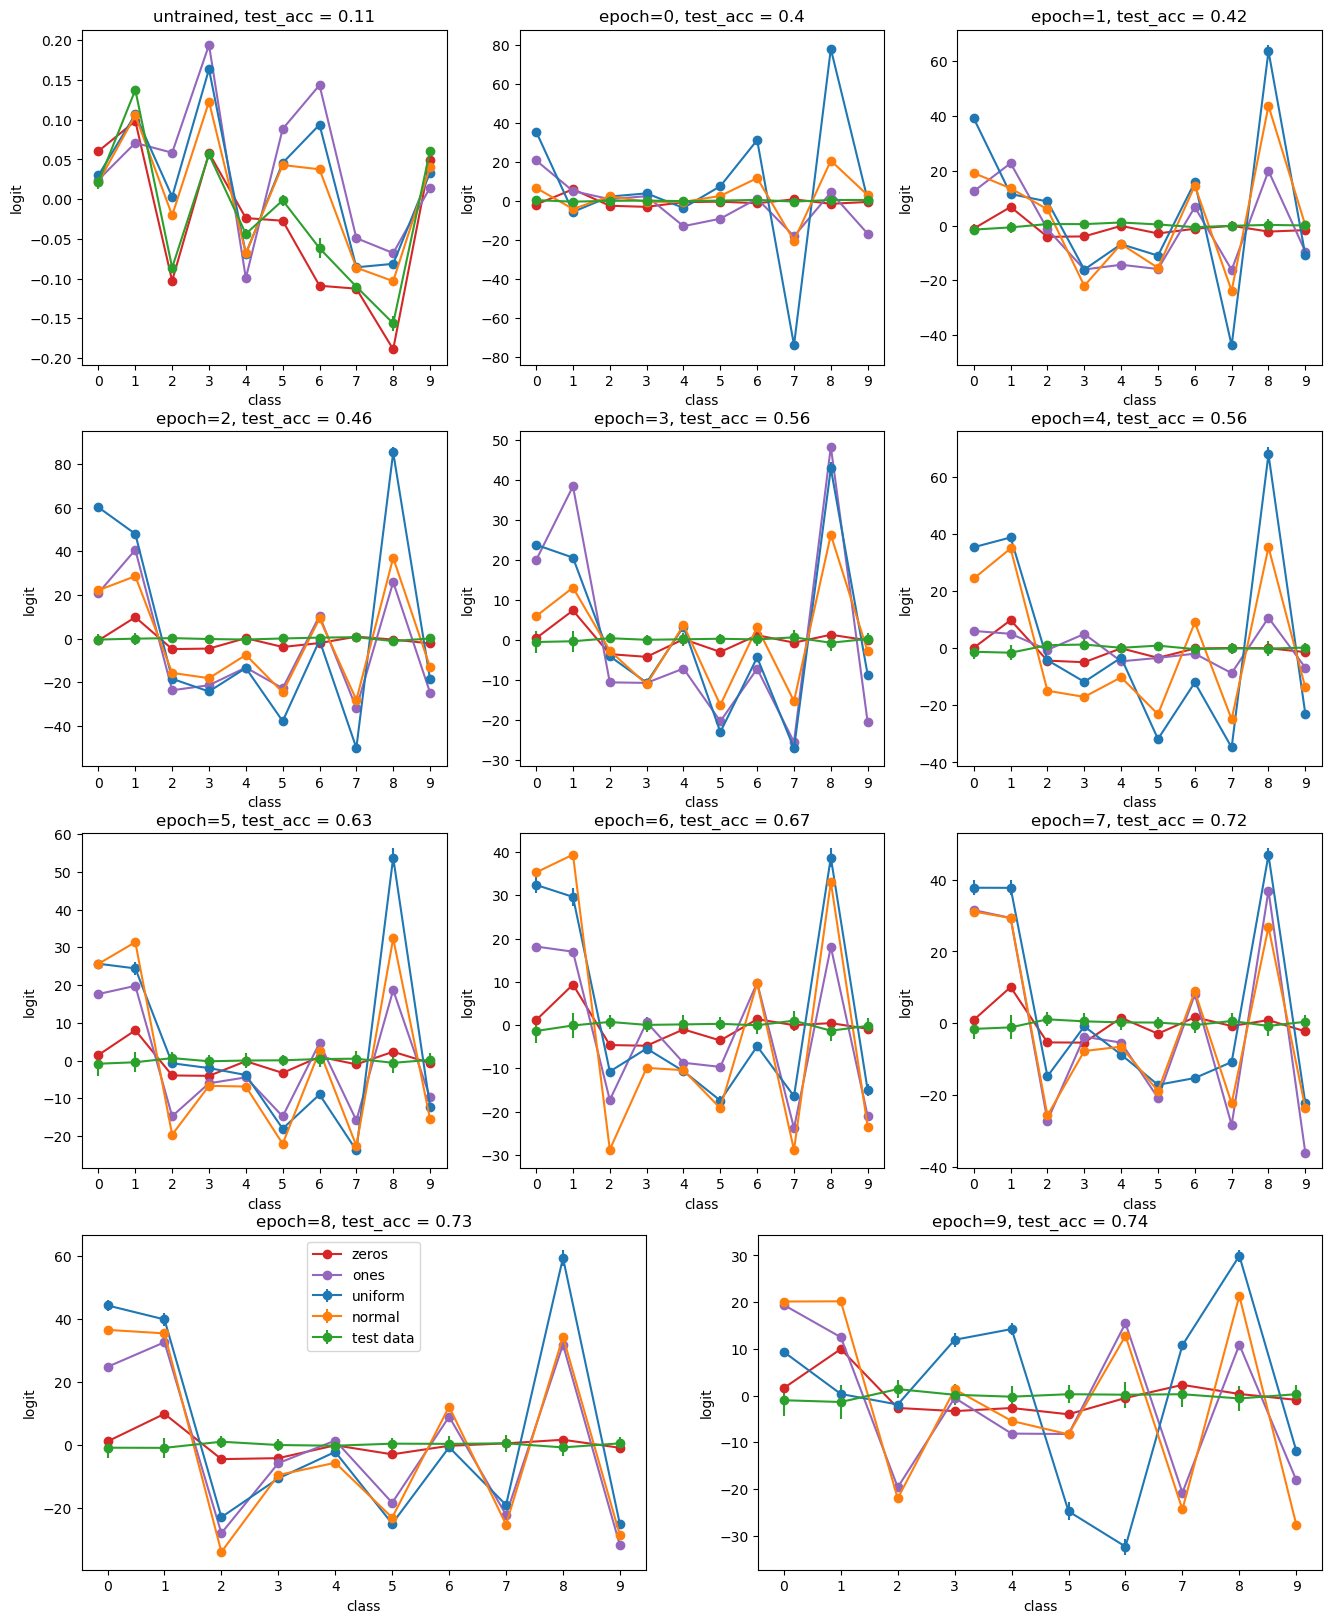

In [99]:
trainer = pl.Trainer(gpus=1, logger=None)

checkpoints = ['untrained.ckpt', 'epoch=0.ckpt', 'epoch=1.ckpt', 'epoch=2.ckpt', 'epoch=3.ckpt', 'epoch=4.ckpt',
              'epoch=5.ckpt', 'epoch=6.ckpt', 'epoch=7.ckpt', 'epoch=8.ckpt', 'epoch=9.ckpt']

titles = [checkpoints[j][:-5] for j in range(len(checkpoints))]

plt.figure(figsize=(16, 20))
ax1 = plt.subplot(4,3,1)
ax2 = plt.subplot(4,3,2)
ax3 = plt.subplot(4,3,3)
ax4 = plt.subplot(4,3,4)
ax5 = plt.subplot(4,3,5)
ax6 = plt.subplot(4,3,6)
ax7 = plt.subplot(4,3,7)
ax8 = plt.subplot(4,3,8)
ax9 = plt.subplot(4,3,9)
ax10 = plt.subplot(4,2,7)
ax11 = plt.subplot(4,2,8)

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11]

for i, checkpoint in enumerate(checkpoints):
    checkpoint_path = os.path.join(artifact_path, checkpoint)
    best_model = torch.load(checkpoint_path)
    hparams = argparse.Namespace(**best_model['hyper_parameters'])
    model = ConvNet(hparams, None, test_data).eval().cpu()
    model.load_state_dict(best_model['state_dict'])
    
    logits_uniform = model(r_sample_uniform).detach()
    logits_normal = model(r_sample_normal).detach()
    logits_data = model(test_data[:1000][0]).detach()
    logits_zeros = torch.squeeze(model(torch.zeros(1,1,60,60)).detach())
    logits_ones = torch.squeeze(model(torch.ones(1,1,60,60)*255).detach())
    
    model.eval()
    test_results = trainer.test(model)
    
    std, mean = torch.std_mean(logits_uniform, dim=-2)
    axs[i].errorbar(torch.arange(10), mean, yerr=std, linestyle='-', marker='o', label='uniform')
    std, mean = torch.std_mean(logits_normal, dim=-2)
    axs[i].errorbar(torch.arange(10), mean, yerr=std, linestyle='-', marker='o', label='normal')
    std, mean = torch.std_mean(logits_data, dim=-2)
    axs[i].errorbar(torch.arange(10), mean, yerr=std, linestyle='-', marker='o', label='test data')
    axs[i].plot(torch.arange(10), logits_zeros, marker='o', label='zeros')
    axs[i].plot(torch.arange(10), logits_ones, marker='o', label='ones')
    axs[i].set_xlabel('class')
    axs[i].set_xticks(torch.arange(10))
    axs[i].set_ylabel('logit')
    axs[i].set_title(titles[i] + f", test_acc = {test_results['test_acc']:.{2}}")
    
axs[9].legend()

# plt.savefig('training_observation_CNN.pdf', bbox_inches="tight")
plt.show()